In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import ast

In [2]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

### 변수당 결측치 갯수 파악

C:\Users\soobin\Anaconda3\lib\site-packages\pandas\plotting\_core.py:194: UserWarning: 'colors' is being deprecated. Please use 'color'instead of 'colors'
  warnings.warn(("'colors' is being deprecated. Please use 'color'"


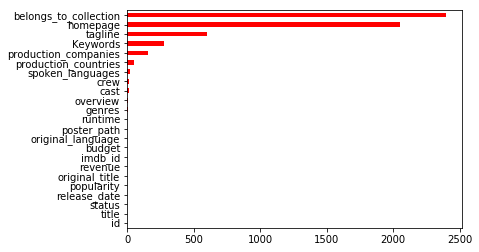

In [5]:
train.isna().sum().sort_values(ascending=True).plot(kind='barh',colors='Red', fontsize=10)

### 연도별 평균 런닝타임

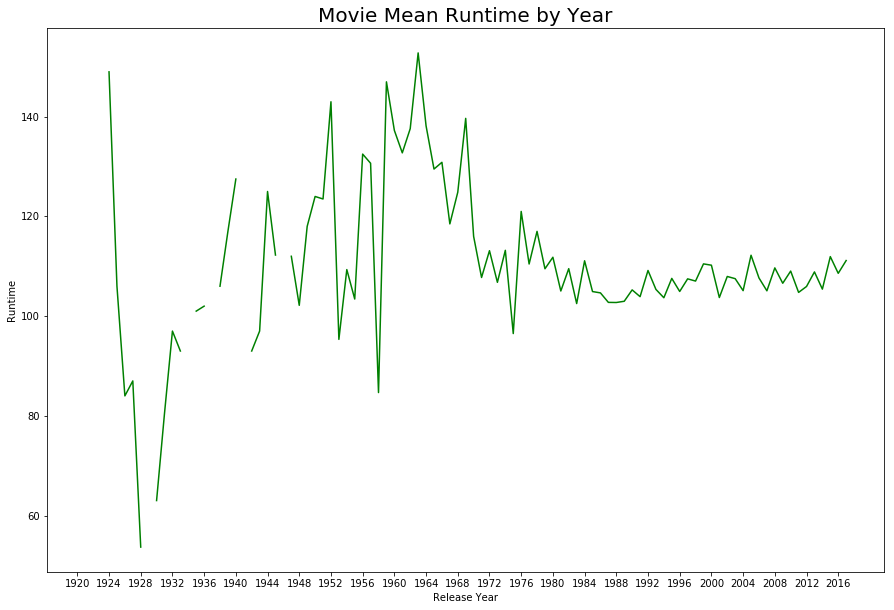

In [9]:
plt.figure(figsize=(20,12))
train['meanruntimeByYear'] = train.groupby("release_year")["runtime"].aggregate('mean')
train['meanruntimeByYear'].plot(figsize=(15,10),color="g")
plt.xticks(np.arange(1920,2018,4))
plt.xlabel("Release Year")
plt.ylabel("Runtime")
plt.title("Movie Mean Runtime by Year",fontsize=20)
plt.show()

### 연도별 평균 인기도

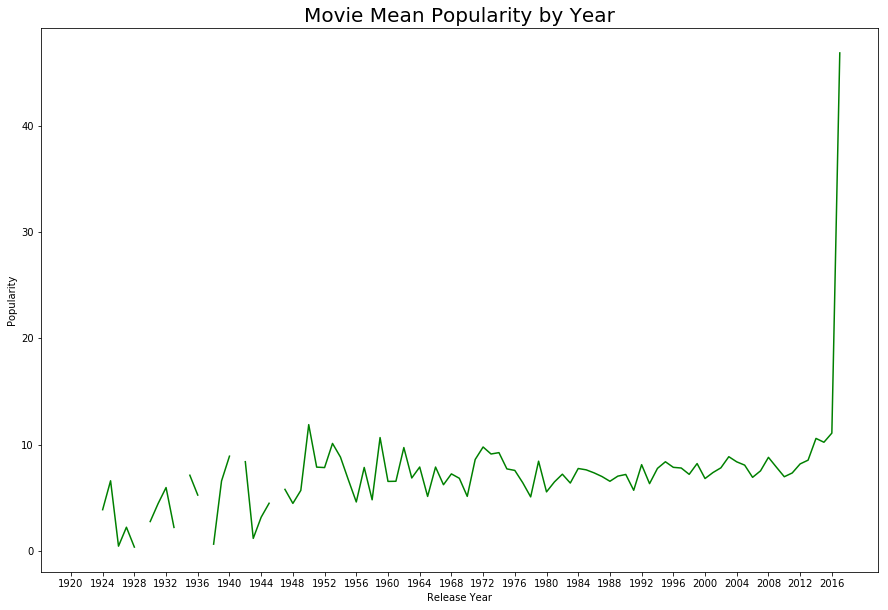

In [10]:
plt.figure(figsize=(20,12))
train['meanPopularityByYear'] = train.groupby("release_year")["popularity"].aggregate('mean')
train['meanPopularityByYear'].plot(figsize=(15,10),color="g")
plt.xticks(np.arange(1920,2018,4))
plt.xlabel("Release Year")
plt.ylabel("Popularity")
plt.title("Movie Mean Popularity by Year",fontsize=20)
plt.show()

### 날짜별 영화 개봉 갯수 파악

In [9]:
# 2/20/15로 되어있는 release date를 연도로 모으기
train[['release_month','release_day','release_year']]=train['release_date'].str.split('/',expand=True).replace(np.nan, -1).astype(int)
# 연도 끝 두자리수만 있기 때문에 앞에 19/20 붙이기
train.loc[ (train['release_year'] <= 19) & (train['release_year'] < 100), "release_year"] += 2000
train.loc[ (train['release_year'] > 19)  & (train['release_year'] < 100), "release_year"] += 1900

releaseDate = pd.to_datetime(train['release_date'])
train['release_dayofweek'] = releaseDate.dt.dayofweek
train['release_quarter'] = releaseDate.dt.quarter

#### 연도별 개봉 갯수

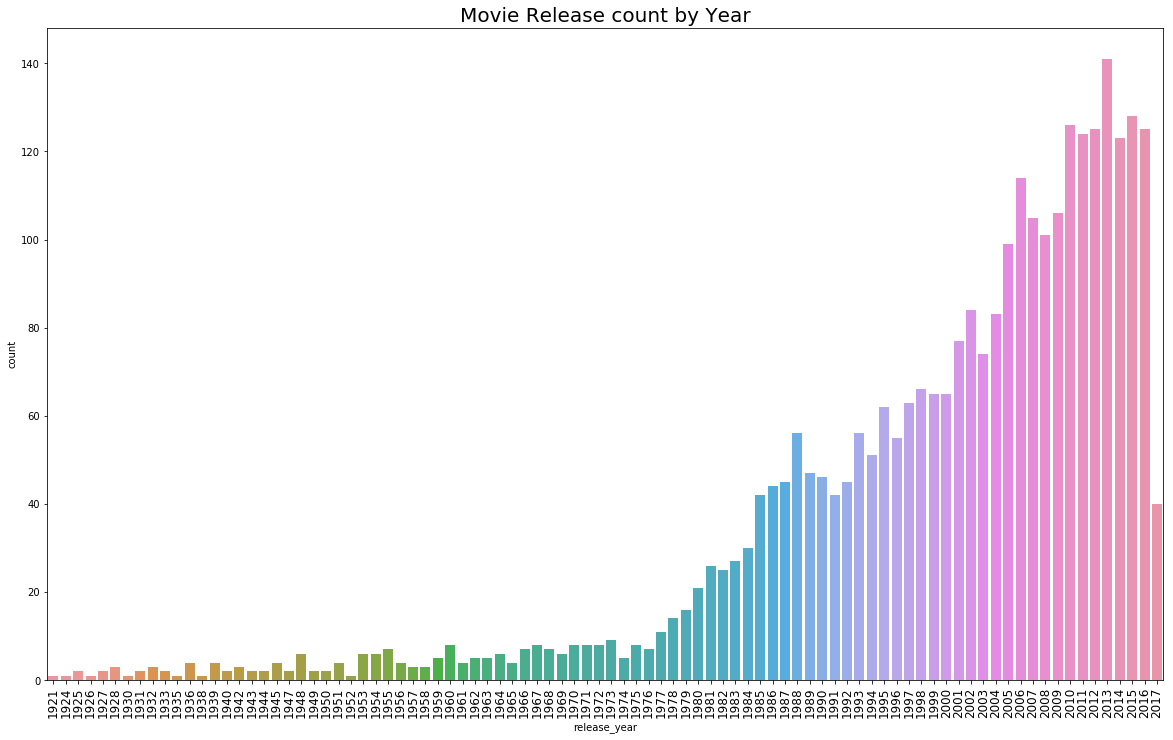

In [10]:
plt.figure(figsize=(20,12))
sns.countplot(train['release_year'].sort_values())
plt.title("Movie Release count by Year",fontsize=20)
loc, labels = plt.xticks()
plt.xticks(fontsize=12,rotation=90)
plt.show()

#### 월별 개봉 갯수

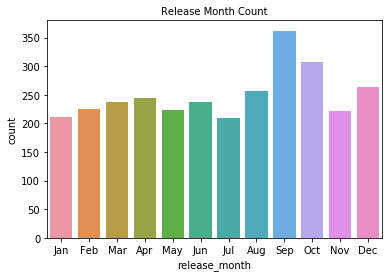

In [11]:
sns.countplot(train['release_month'].sort_values())
plt.title("Release Month Count",fontsize=10)
loc, labels = plt.xticks()
loc, labels = loc, ["Jan", "Feb", "Mar", "Apr", "May", "Jun", "Jul", "Aug", "Sep", "Oct", "Nov", "Dec"]
plt.xticks(loc, labels,fontsize=10)
plt.show()

#### 일별 개봉 갯수

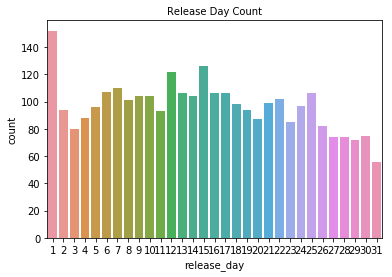

In [12]:
sns.countplot(train['release_day'].sort_values())
plt.title("Release Day Count",fontsize=10)
plt.xticks(fontsize=10)
plt.show()

#### 요일별 개봉 갯수

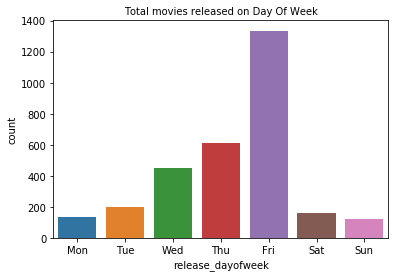

In [14]:
sns.countplot(train['release_dayofweek'].sort_values())
plt.title("Total movies released on Day Of Week",fontsize=10)
loc, labels = plt.xticks()
loc, labels = loc, ["Mon","Tue","Wed","Thu","Fri","Sat","Sun"]
plt.xticks(loc, labels,fontsize=10)
plt.show()

#### 분기별 개봉 갯수

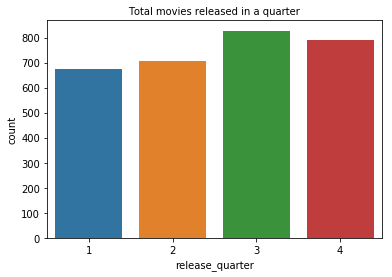

In [15]:
sns.countplot(train['release_quarter'].sort_values())
plt.title("Total movies released in a quarter",fontsize=10)
plt.show()

### 수익과 변수와의 관계

#### 예산과 수익의 관계

C:\Users\soobin\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


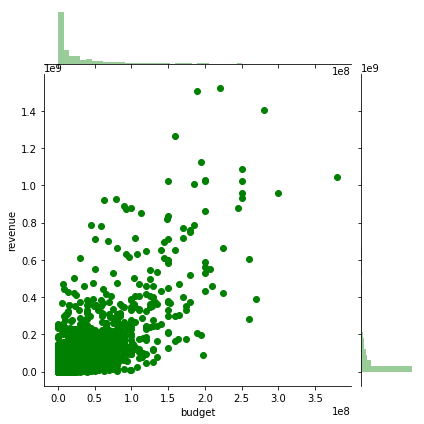

In [3]:
sns.jointplot(x="budget", y="revenue", data=train, color="g")
plt.show()

#### 인기도와 수익의 관계

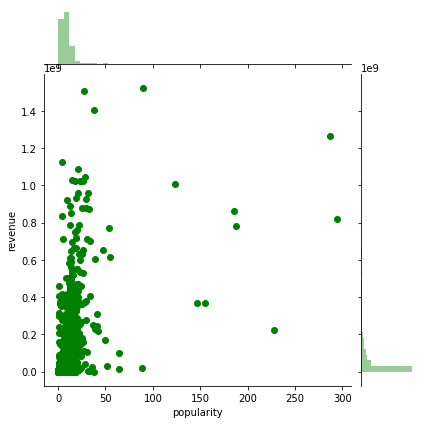

In [6]:
sns.jointplot(x="popularity", y="revenue", data=train, color="g")
plt.show()

#### 러닝타임과 수익의 관계

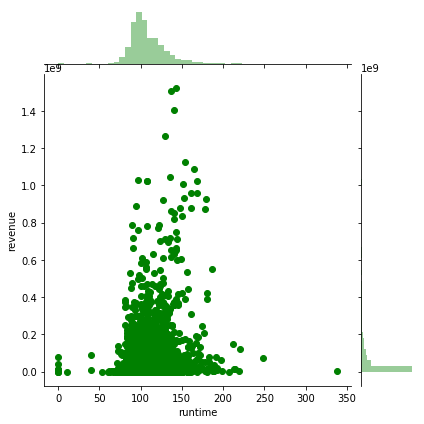

In [7]:
sns.jointplot(x="runtime", y="revenue", data=train, color="g")
plt.show()

#### 홈페이지 유무

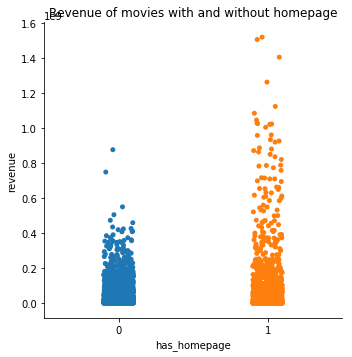

In [20]:
train['has_homepage'] = 1
train.loc[pd.isnull(train['homepage']) ,"has_homepage"] = 0
sns.catplot(x="has_homepage", y="revenue", data=train)
plt.title('Revenue of movies with and without homepage');

#### 테그라인 유무

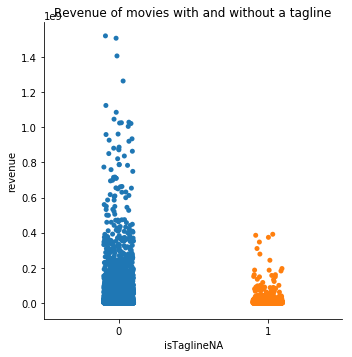

In [21]:
train['isTaglineNA'] = 0
train.loc[pd.isnull(train['tagline']) ,"isTaglineNA"] = 1
sns.catplot(x="isTaglineNA", y="revenue", data=train)
plt.title('Revenue of movies with and without a tagline');

#### 원제목 영문 여부

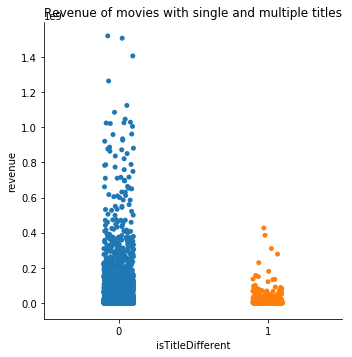

In [22]:
train['isTitleDifferent'] = 1
train.loc[ train['original_title'] == train['title'] ,"isTitleDifferent"] = 0 
sns.catplot(x="isTitleDifferent", y="revenue", data=train)
plt.title('Revenue of movies with single and multiple titles');

#### 원언어 영어 여부

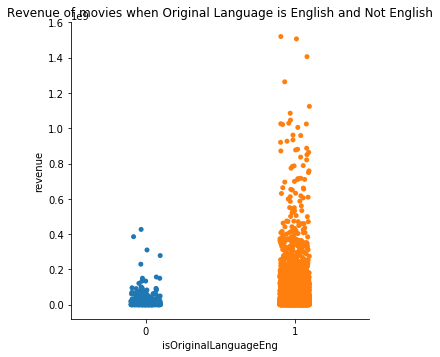

In [23]:
train['isOriginalLanguageEng'] = 0 
train.loc[ train['original_language'] == "en" ,"isOriginalLanguageEng"] = 1
sns.catplot(x="isOriginalLanguageEng", y="revenue", data=train)
plt.title('Revenue of movies when Original Language is English and Not English');

#### Collection 포함 여부

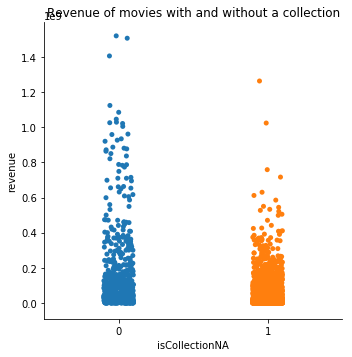

In [24]:
train['isCollectionNA'] = 0
train.loc[pd.isnull(train['belongs_to_collection']) ,"isCollectionNA"] = 1
sns.catplot(x="isCollectionNA", y="revenue", data=train)
plt.title('Revenue of movies with and without a collection');

#### 키워드 포함 여부

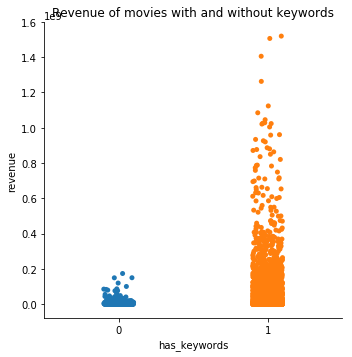

In [3]:
train['has_keywords'] = 1
train.loc[pd.isnull(train['Keywords']) ,"has_keywords"] = 0
sns.catplot(x="has_keywords", y="revenue", data=train)
plt.title('Revenue of movies with and without keywords');

#### 제작국가 미국 여부

```python
train['isProductionCountryUS'] = 0
train.loc[ train['all_production_countries'] == "United States of America" ,"isProductionCountryUS"] = 1
sns.catplot(x="isProductionCountryUS", y="revenue", data=train)
plt.title('Revenue of movies when Production Country is/not US');
```

![](https://user-images.githubusercontent.com/42176961/56793625-6223f080-6847-11e9-8228-b6fb2b979952.JPG)

#### 사용언어 영어 여부

```python
train['isSpokenLanguageEng'] = 0
train.loc[ train['all_spoken_languages'] == "English" ,"isSpokenLanguageEng"] = 1
sns.catplot(x="isSpokenLanguageEng", y="revenue", data=train)
plt.title('Revenue of movies when Spoken Language is/not English');
```

![](https://user-images.githubusercontent.com/42176961/56793655-710aa300-6847-11e9-9b6b-b615c65aebcc.JPG)

### 날짜별 영화 평균 수익 파악

#### 연도별 평균 수익

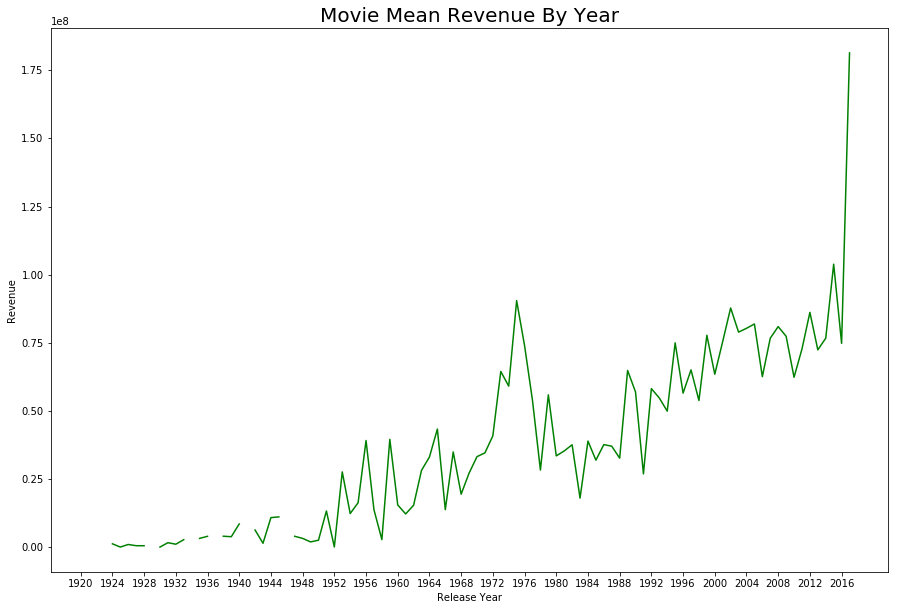

In [16]:
train['meanRevenueByYear'] = train.groupby("release_year")["revenue"].aggregate('mean')
train['meanRevenueByYear'].plot(figsize=(15,10),color="g")
plt.xticks(np.arange(1920,2018,4))
plt.xlabel("Release Year")
plt.ylabel("Revenue")
plt.title("Movie Mean Revenue By Year",fontsize=20)
plt.show()

#### 월별 평균 수익

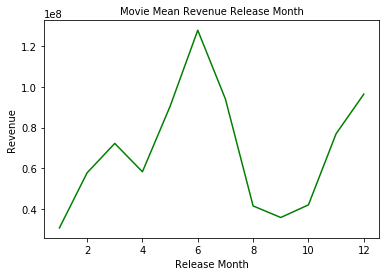

In [17]:
train['meanRevenueByMonth'] = train.groupby("release_month")["revenue"].aggregate('mean')
train['meanRevenueByMonth'].plot(color="g")
plt.xlabel("Release Month")
plt.ylabel("Revenue")
plt.title("Movie Mean Revenue Release Month",fontsize=10)
plt.show()

#### 요일별 평균 수익

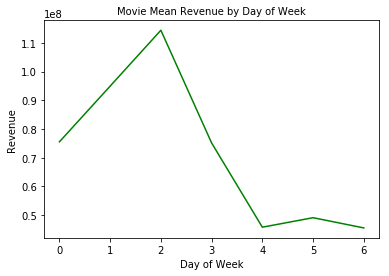

In [18]:
train['meanRevenueByDayOfWeek'] = train.groupby("release_dayofweek")["revenue"].aggregate('mean')
train['meanRevenueByDayOfWeek'].plot(color="g")
plt.xlabel("Day of Week")
plt.ylabel("Revenue")
plt.title("Movie Mean Revenue by Day of Week",fontsize=10)
plt.show()

#### 분기별 평균 수익

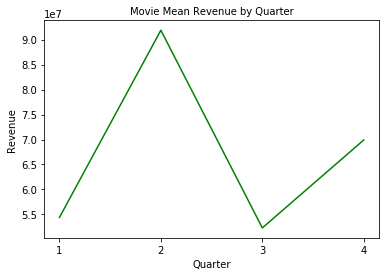

In [19]:
train['meanRevenueByQuarter'] = train.groupby("release_quarter")["revenue"].aggregate('mean')
train['meanRevenueByQuarter'].plot(color="g")
plt.xticks(np.arange(1,5,1))
plt.xlabel("Quarter")
plt.ylabel("Revenue")
plt.title("Movie Mean Revenue by Quarter",fontsize=10)
plt.show()